<a href="https://colab.research.google.com/github/Rymendelous/projetadd/blob/main/projetadd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problématique** 💗
**Dans quelle mesure les caractéristiques socio-démographiques des départements français permettent-elles de modéliser et prédire la couverture vaccinale Covid-19 ?** 💉🌍

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #pour accéder au drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Étape 0: Importation des bibliothèques et chargement des jeux de données 🎀**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data_path='/content/drive/MyDrive/projetadd/data/raw/covid.csv'
data_path_agemedian='/content/drive/MyDrive/projetadd/data/raw/agemedian.csv'
data_path_pop='/content/drive/MyDrive/projetadd/data/raw/densitepopulation/pop2022.csv'
data_path_education='/content/drive/MyDrive/projetadd/data/raw/education/education.csv'
data_path_revenu='/content/drive/MyDrive/projetadd/data/raw/revenumedian/revmedian.csv'
data = pd.read_csv(data_path, sep=";", nrows=50)


# **Étape 1 : Nettoyage et compréhension des jeux de données 🎀**

On commence dans un premier temps par nettoyer nos datasets un par un.



# **DATASET DENSITÉ DE POPULATION👩‍💻**

On ne garde que :

*   l'année **2022** car c'est la seule année qui est en commun sur tout nos jeux de données.
*   la population totale au lieu des sexes séparés

On transforme tous les numéros de départements en string au lieu de int pour ne pas avoir d'erreur


In [ ]:
#ON NETTOIE LE DATASET DE DENSITÉ DE POPULATION ET ON VISUALISE LA POPULATION PAR DÉPARTEMENTS AVEC DES HISTOGRAMMES
#pop = JEU DE DONNÉES DE DENSITÉ
data_dep = pd.read_csv(data_path_pop, sep=";", dtype={'GEO': str}, low_memory=False)

# on garde que les départements de la métropoles, on enlève ceux d'outre mer et de corse
# 01 à 95 uniquement
metropole = [str(i).zfill(2) for i in range(1, 96)] #str(i).zfill(2)  transforme les numéros de dép à 1 chiffre en numéro à deux chiffre par exemple pour l'ain 01 au lieu de 1
pop = data_dep[data_dep['GEO'].isin(metropole)]
pop = pop[pop['TIME_PERIOD'] == 2022]
pop = pop[pop['SEX'] == '_T']
pop = pop.reset_index(drop=True)



In [ ]:
pop['AGE'].unique()

array(['Y15T24', 'Y20T64', 'Y25T39', 'Y40T54', 'Y_GE80', 'Y55T64',
       'Y_GE65', '_T', 'Y65T79', 'Y_LT20', 'Y_LT15'], dtype=object)

In [ ]:
age_rename = {
    'Y_LT15': '<15',
    'Y_LT20': '<20',
    'Y15T24': '15-24',
    'Y20T64': '20-64',
    'Y25T39': '25-39',
    'Y40T54': '40-54',
    'Y55T64': '55-64',
    'Y65T79': '65-79',
    'Y_GE65': '65+',
    'Y_GE80': '80+',
    '_T': 'Total'
}

pop['AGE'] = pop['AGE'].map(age_rename) #on renomme les valeurs de la variables AGE car c'était pas clair les Y.. machin
pop = pop[['GEO', 'AGE', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'NB_PERSONNES','GEO':'DEP'}) #on renomme les noms des colonnes pour plus de clarté
pop.head(30)

,DEP,AGE,NB_PERSONNES
0,93,15-24,225145.217999
1,42,20-64,408691.081674
2,45,25-39,119253.561146
3,07,20-64,175359.148527
4,37,20-64,335190.569080
5,46,20-64,88981.646406
6,82,40-54,53252.100040
7,81,25-39,58420.441490
8,95,40-54,251935.510441
9,02,15-24,58684.585426


On visualise avec un histogramme ce qu'on a nettoyé du dataset densité de population pour voir si nos valeurs sont cohérentes.

Ici c'est le cas car la tranche d'âge majoritaire en France en 2022 est celle des **20-64 ans**.

Text(0.5, 1.0, "Répartition de la population par tranche d'âge en France(2022)")

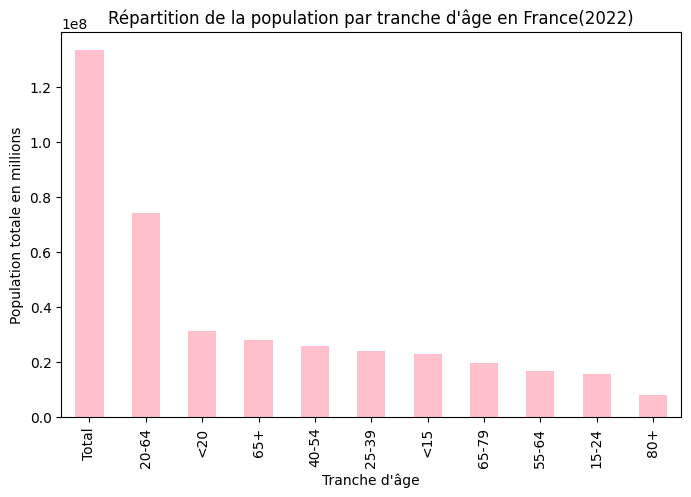

In [ ]:
pop_age_total = pop.groupby('AGE')['NB_PERSONNES'].sum().sort_values(ascending=False) #pour chaque tranche d'âge on calcule le nombre total de personnes
pop_age_total.plot(kind='bar', figsize=(8,5), color='pink')
plt.ylabel("Population totale en millions")
plt.xlabel("Tranche d'âge")
plt.title("Répartition de la population par tranche d'âge en France(2022)")


Ce sont les départements qui nous intéressent, on représente donc maintenant **les tranches d'âge par département** avec un **histogramme empilé**.

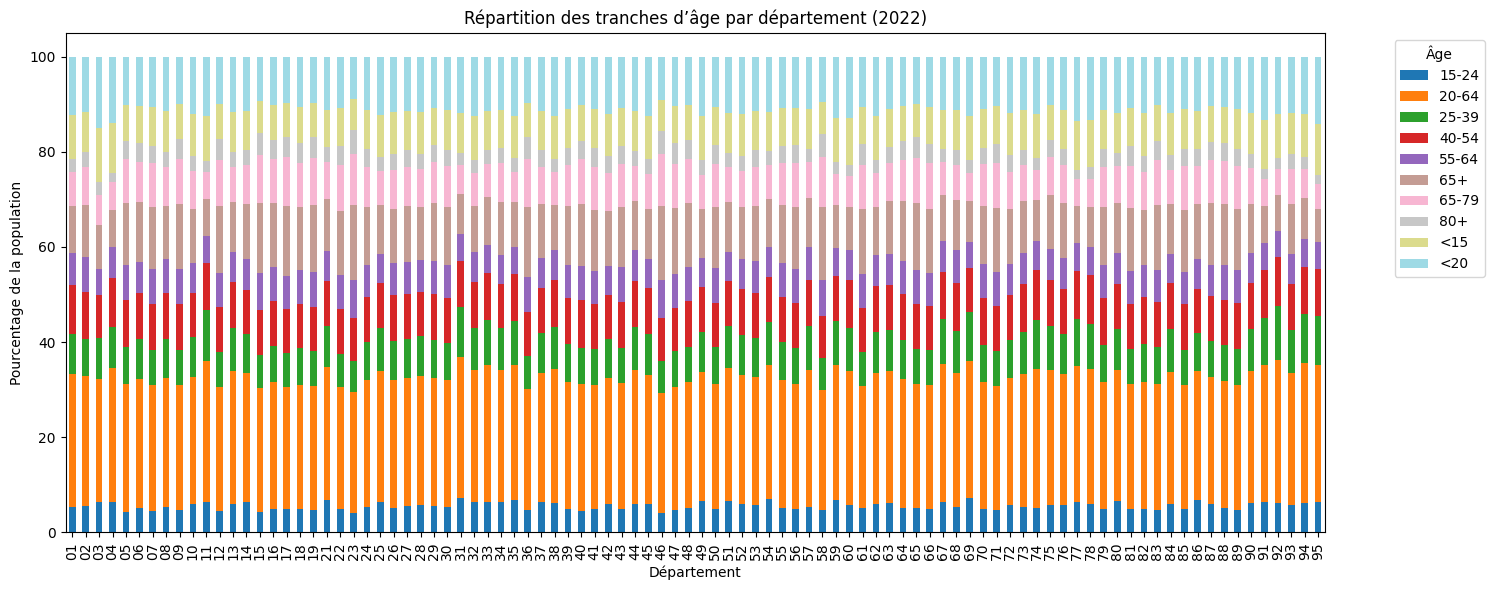

,DEP,AGE,NB_PERSONNES,POP_TOT,POURCENTAGE
0,01,15-24,114431.132239,2.109716e+06,5.424006
1,01,20-64,587293.854589,2.109716e+06,27.837579
2,01,25-39,177961.951238,2.109716e+06,8.435351
3,01,40-54,216652.117650,2.109716e+06,10.269255
4,01,55-64,144304.296828,2.109716e+06,6.839987


In [ ]:
pop_sans_total = pop[pop['AGE'] != 'Total']
#pour chaque département on calcule le nbre de personnes pour chaque tranche dage
pop_dep_age = pop_sans_total.groupby(['DEP', 'AGE'])['NB_PERSONNES'].sum().reset_index()

# on calcule maintenant la population totale pour chaque département toute tranche d'age confondue
pop_total_dep = pop_dep_age.groupby('DEP')['NB_PERSONNES'].sum().reset_index()
pop_total_dep = pop_total_dep.rename(columns={'NB_PERSONNES': 'POP_TOT'})

#on calcule le pourcentage de chaque tranche d'age pour un departement donc pop de la tranche d'age / pop totale du departement
pop_dep_age = pop_dep_age.merge(pop_total_dep, on='DEP')
pop_dep_age['POURCENTAGE'] = 100 * pop_dep_age['NB_PERSONNES'] / pop_dep_age['POP_TOT']

#Pivot pour histogramme empilé (pas le choix pour empilé il faut un pivot c'est le plus simple quoi)
pop_pivot = pop_dep_age.pivot(index='DEP', columns='AGE', values='POURCENTAGE')

#Histogramme empilé
pop_pivot.plot(kind='bar', stacked=True, figsize=(15,6), colormap='tab20')
plt.ylabel('Pourcentage de la population')
plt.xlabel('Département')
plt.title('Répartition des tranches d’âge par département (2022)')
plt.legend(title='Âge', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()
pop_dep_age.head()


# **DATASET NIVEAU D'ÉDUCATION👩‍💻**
Le jeu de données relatif au niveau d'éducation est traité selon le même raisonnement que le jeu de données de densité de population.

On conserve uniquement :
- l'année 2022,
- les départements de la France métropolitaine,
- la population totale.



In [ ]:
#ON NETTOIE LE DATASET D'ÉDUCATION
#il ya que la tranche d'age 15ans et plus pour ce jeu de données
#on fait pareil que la densité de population
data_education = pd.read_csv(data_path_education, sep=";", dtype={'GEO': str}, low_memory=False)

education = data_education[
    (data_education['GEO_OBJECT'] == 'DEP') &
    (data_education['GEO'].isin(metropole)) &
    (data_education['TIME_PERIOD'] == 2022) &
    (data_education['SEX'] == '_T')
].reset_index(drop=True)

#on garde seulement ces 3 variables car ce sont les seules utiles pour notre analyse
education = education[['GEO', 'EDUC', 'OBS_VALUE']].rename(columns={'OBS_VALUE': 'NB_PERSONNES','GEO':'DEP'})
#education.head(20)
education['EDUC'].unique() #permet de voir les noms des diplomes qui restent apres avoir trié le jeu de donnée (certains diplomes ne sont plus présent il faut par conséquent adapter le dictionnaire)
education_rename = {
    '_T': 'Total',
    '001T100_RP': 'Aucun diplôme / CEP',
    '200_RP': 'BEPC / DNB',
    '300_RP': 'CAP / BEP',
    '350T351_RP': 'Bac / Brevet pro',
    '500_RP': 'BTS / DUT / Bac+2',
    '600_RP': 'Licence / Bac+3-4',
    '700_RP': 'Master / Bac+5+'
}
education['EDUC'] = education['EDUC'].replace(education_rename)
education[education['DEP'] == '69'].head(40)



,DEP,EDUC,NB_PERSONNES
2,69,Licence / Bac+3-4,1.613726e+05
67,69,Aucun diplôme / CEP,2.290669e+05
340,69,Bac / Brevet pro,2.163570e+05
461,69,BEPC / DNB,5.710046e+04
511,69,Total,1.330757e+06
552,69,CAP / BEP,2.474421e+05
633,69,Master / Bac+5+,2.575760e+05
711,69,BTS / DUT / Bac+2,1.618419e+05


# **DATASET ÂGE MÉDIAN 👩‍💻**

Notre jeu de données initial contient une ligne par **commune × sexe × tranche d'âge**, avec le nombre de personnes par tranche d'âge (NB).

Nous voulons travailler au niveau des **départements** et non des communes, et nous ne nous intéressons pas aux sexes séparés mais à la population totale.

**Procédure :**

**ÉTAPE 1 : Agrégation par tranche d'âge**
- Certaines communes ont plusieurs lignes pour la même tranche d'âge (hommes/femmes).  
- On fait un **GROUP BY par tranche d'âge pour chaque commune** et on **somme le nombre de personnes (NB)** pour obtenir la population totale par tranche d'âge.  
- Résultat : chaque commune a une ligne par tranche d'âge avec le nombre total de personnes dans cette tranche.

**ÉTAPE 2 : Passage au niveau département**
- À partir du code géographique (CODGEO) des communes, on extrait le **code département**.  
- On fait un **GROUP BY par département et tranche d'âge** et on somme NB pour toutes les communes du département.  

**Résultat**: chaque département a pour chaque tranche d'âge le nombre total de personnes, prêt pour le calcul de la médiane.


In [ ]:
#ON NETTOIE LE DATASET AGE MEDIAN
age_median = pd.read_csv(data_path_agemedian, sep=";", dtype={'CODGEO': str}, low_memory=False)
age_median.head(10)

,NIVGEO,CODGEO,LIBGEO,SEXE,AGEPYR10,NB
0,COM,01001,L'Abergement-Clémenciat,1,0,19.0
1,COM,01001,L'Abergement-Clémenciat,2,0,14.0
2,COM,01001,L'Abergement-Clémenciat,1,3,15.0
3,COM,01001,L'Abergement-Clémenciat,2,3,13.0
4,COM,01001,L'Abergement-Clémenciat,1,6,36.0
5,COM,01001,L'Abergement-Clémenciat,2,6,20.0
6,COM,01001,L'Abergement-Clémenciat,1,11,42.0
7,COM,01001,L'Abergement-Clémenciat,2,11,39.0
8,COM,01001,L'Abergement-Clémenciat,1,18,15.0
9,COM,01001,L'Abergement-Clémenciat,2,18,15.0


## **Calcul de l'âge médian par département**

Maintenant que nous avons le nombre de personnes par tranche d'âge pour chaque département, nous pouvons calculer l'âge médian.

**Principe :**
1. Calculer la **population totale** du département.  
2. Cumuler la population **tranche par tranche**, de la plus jeune à la plus âgée.  
3. Identifier la **tranche médiane**, c'est-à-dire la tranche dans laquelle se trouve la personne correspondant à la moitié de la population.  
4. Pour obtenir l'âge médian précis :  
   - On prend l'**âge minimum de cette tranche**  
   - On ajoute **la proportion des personnes manquantes pour atteindre la moitié de la population totale** à l’intérieur de la tranche.

Ainsi, on obtient un âge médian interpolé, qui n’est pas forcément exactement une borne de tranche mais reflète mieux la répartition réelle de la population.

In [ ]:
# Bornes d'âge
age_bins = {
    '0': [0, 2],    '3': [3, 5],    '6': [6, 10],   '11': [11, 17],
    '18': [18, 24], '25': [25, 39], '40': [40, 54], '55': [55, 64],
    '65': [65, 79], '80': [80, 100]
}

#ÉTAPES POUR LE CALCUL DE L'ÂGE MÉDIAN

def calcul_age_median(df_group):
    total_pop = df_group['NB'].sum()
    if total_pop <= 0:
        return 0.0

    # Tri par âge pour le cumul
    df_group = df_group.sort_values('age_inf')
    target = total_pop / 2
    df_group['cum_nb'] = df_group['NB'].cumsum()

    # Trouver la tranche médiane
    bins_contenant_mediane = df_group[df_group['cum_nb'] >= target]
    if bins_contenant_mediane.empty:
        return 0.0

    median_bin = bins_contenant_mediane.iloc[0]

    # Cumul AVANT la tranche
    prev_cum = df_group[df_group['cum_nb'] < target]['NB'].sum()

    L = median_bin['age_inf']
    f = median_bin['NB']
    w = median_bin['age_sup'] - median_bin['age_inf']

    if f == 0: return L

    # Formule de l'âge médian
    return L + ((target - prev_cum) / f) * w

#NETTOYAGE

#On converti NB en string
age_median['NB'] = (
    age_median['NB']
    .astype(str)
    .str.replace(',', '.')
    .pipe(pd.to_numeric, errors='coerce')
    .fillna(0)
)

# B.On converti AGEPYR10 en string et on enlève les espaces
age_median['AGEPYR10'] = age_median['AGEPYR10'].astype(str).str.strip()

#age_inf contient le minimum pour chaque tranche d'age à chaque fois
#on va chercher dans le dictionnaire la tranche d'age correspondante lors du mapping a chaque fois
age_median['age_inf'] = age_median['AGEPYR10'].map(lambda x: age_bins.get(x, [np.nan, np.nan])[0])
age_median['age_sup'] = age_median['AGEPYR10'].map(lambda x: age_bins.get(x, [np.nan, np.nan])[1])


#CALCUL PAR DÉPARTEMENT

# On extrait chaque département à partir de la commune
age_median['DEP'] = age_median['CODGEO'].astype(str).str.zfill(5).str[:2]

dep_data = (
    age_median.dropna(subset=['age_inf'])
    .groupby(['DEP', 'age_inf', 'age_sup'])['NB']
    .sum()
    .reset_index()
)

#on associe à chaque département un age médian
age_median_dep = (
    dep_data.groupby('DEP')
    .apply(calcul_age_median, include_groups=False)
    .reset_index()
)

#Renommage des colonnes
age_median_dep.columns = ['DEP', 'AGE_MEDIAN']


age_median_dep.head(10)

,DEP,AGE_MEDIAN
0,01,41.255572
1,02,42.930485
2,03,48.589944
3,04,48.237106
4,05,47.529988
5,06,45.363529
6,07,47.148072
7,08,44.383463
8,09,48.099253
9,10,42.890264


Text(0.5, 1.0, 'Âge médian pondéré pour les 10 premiers départements')

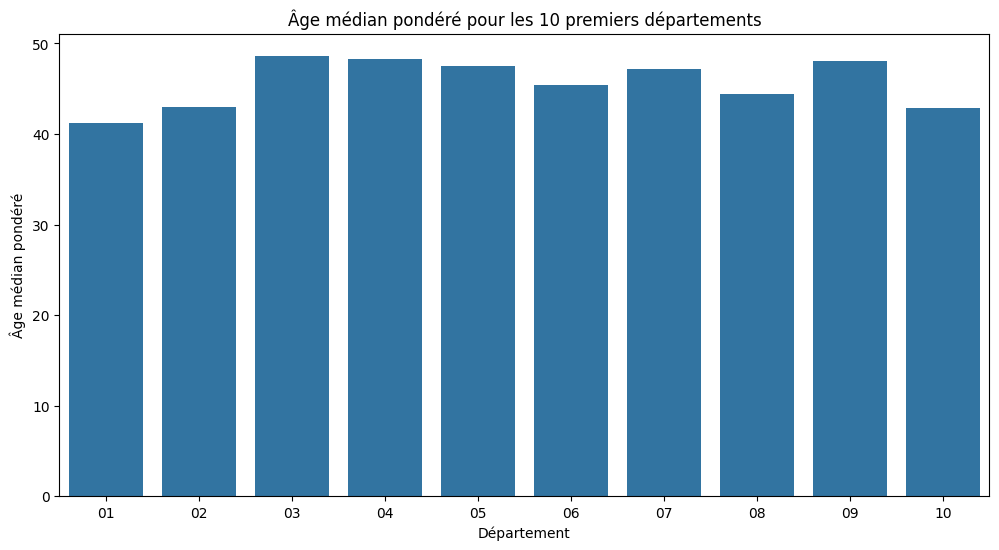

In [ ]:
#on representer pour 10 départements car si on fais tout les départements de la métropole ça sera illisible
dep10 = age_median_dep.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='DEP', y='AGE_MEDIAN', data=dep10)
plt.xlabel("Département")
plt.ylabel("Âge médian pondéré")
plt.title("Âge médian pondéré pour les 10 premiers départements")


# **DATASET REVENU👩‍💻**

Notre jeu de données initial contient une ligne par **Commune × Indicateur**. Chaque ligne donne soit le revenu médian, soit le taux de pauvreté, soit le nombre d'habitants pour une commune donnée.

**Procédure :**

**ÉTAPE 1 :**

Nous filtrons les codes géographiques (GEO) pour ne garder que les communes (codes à 5 chiffres), en excluant les codes agrégés Unités Urbaines (UU) ou Aires d'Attraction (AAV).


**ÉTAPE 2 :**

Initialement, les différents indicateurs (MED_SL, NUM_PER, etc.) sont empilés dans une seule colonne.
Nous effectuons un pivotage : nous créons de nouvelles colonnes pour chaque indicateur.


**Résultat :** Chaque commune ne possède plus qu'une seule ligne, avec des colonnes distinctes pour son revenu médian et sa population.


**ÉTAPE 3 :**

Nous extrayons le code DEP à partir des deux premiers chiffres du code commune.

Nous filtrons pour ne conserver que la France métropolitaine (01 à 95).

In [ ]:
#ON NETTOIE LE DATASET REVENU
revenu_median=pd.read_csv(data_path_revenu,sep=";",low_memory=False)
revenu_median = revenu_median.rename(columns={'OBS_VALUE': 'valeur'})
revenu_median['DEP'] = revenu_median['GEO'].str[:2]
revenu = revenu_median[
    (revenu_median['TIME_PERIOD'] == 2021) &
    (revenu_median['DEP'].isin(metropole)) &
    (revenu_median['DEP'] == '01')
].reset_index(drop=True)


revenu = revenu[['DEP', 'valeur', 'FILOSOFI_MEASURE','UNIT_MEASURE']]
revenu['FILOSOFI_MEASURE'].unique()

#on renomme les variables pas claires
revenu_rename = {
    'MED_SL': 'Niveau de vie median',
    'PR_MD60': 'Taux de pauvreté',
    'IR_D9_D1_SL': 'Inégalités',
    'NUM_PER':'Nombre de personnes par commune',
}

revenu_mesurerename = {
    '_Z':'Nombre',
    'EUR_YR':'Euros par an',
    'PS':'Personnes',
    'PT':'Pourcentage',
}

revenu['FILOSOFI_MEASURE'] = revenu['FILOSOFI_MEASURE'].map(revenu_rename)
revenu['UNIT_MEASURE'] = revenu['UNIT_MEASURE'].map(revenu_mesurerename)

revenu.head(50)


,DEP,valeur,FILOSOFI_MEASURE,UNIT_MEASURE
0,01,NaN,NaN,Pourcentage
1,01,NaN,NaN,Pourcentage
2,01,NaN,NaN,Pourcentage
3,01,23300.0,Niveau de vie median,Euros par an
4,01,NaN,NaN,Pourcentage
5,01,NaN,Inégalités,Nombre
6,01,NaN,NaN,Pourcentage
7,01,60280.0,NaN,Euros par an
8,01,NaN,NaN,Pourcentage
9,01,NaN,NaN,Euros par an


### **Calcul du revenu median**
On ne peut pas simplement faire la moyenne des revenus médians des communes (ce qui serait faux car une petite commune pèserait autant qu'une grande ville).

Pour chaque commune, on multiplie son revenu median par son nombre d'habitants. On somme ces "Masses de Revenu" ainsi que le nombre total d'habitants au niveau du département.Enfin, on divise la somme des masses par la somme des habitants.
$$\text{revenu mediant dep} = \frac{\sum (\text{Revenu mediant commune} \times \text{Population commune})}{\sum \text{Population commune}}$$

**Résultat :** On obtient une estimation du revenu médian par département, pondérée par le poids démographique de chaque commune.

In [ ]:
# 1. Chargement
revenu_median = pd.read_csv(data_path_revenu, sep=";", dtype={'GEO': str}, low_memory=False)
revenu_median = revenu_median.rename(columns={'OBS_VALUE': 'valeur'})

# 2. FILTRAGE COMMUNES
df_communes = revenu_median[
    (revenu_median['TIME_PERIOD'] == 2021) &
    (revenu_median['GEO'].str.len() == 5) &
    (~revenu_median['GEO'].str.contains('-')) &
    (~revenu_median['GEO'].str.startswith('00'))
].copy()

# 3. PIVOTAGE
df_final = df_communes.pivot_table(
    index='GEO',
    columns='FILOSOFI_MEASURE',
    values='valeur'
).reset_index()

# 4. RENOMMAGE
revenu_rename = {
    'MED_SL': 'Revenu_median',
    'PR_MD60': 'Taux_pauvrete',
    'IR_D9_D1_SL': 'Inegalites',
    'NUM_PER': 'Nombre_habitants'
}
df_final = df_final.rename(columns=revenu_rename)

# 5. CREATION DU DEPARTEMENT
df_final['DEP'] = df_final['GEO'].str[:2]


# Departement france métropolitaine
df_final = df_final[
    (df_final['DEP'].str.isnumeric()) &
    (df_final['DEP'].astype(str) <= '95') &
    (~df_final['DEP'].isin(['2A', '2B']))
].copy()

# Nettoyage des colonnes
colonnes_finales = ['GEO', 'DEP', 'Nombre_habitants', 'Revenu_median', 'Taux_pauvrete']
df_final = df_final[[c for c in colonnes_finales if c in df_final.columns]]

# Supprimer les lignes vides
df_final = df_final.dropna(subset=['Revenu_median', 'Nombre_habitants'], how='all')

# CALCUL DU REVENU MEDIAN PAR DEPARTEMENT
df_final['Revenu_median'] = pd.to_numeric(df_final['Revenu_median'])
df_final['Nombre_habitants'] = pd.to_numeric(df_final['Nombre_habitants'])
df_final['Masse_Revenu'] = df_final['Revenu_median'] * df_final['Nombre_habitants']

df_dep_calcule = df_final.groupby('DEP').agg({
    'Masse_Revenu': 'sum',
    'Nombre_habitants': 'sum'
}).reset_index()

df_dep_calcule['Revenu_median_calcule'] = df_dep_calcule['Masse_Revenu'] / df_dep_calcule['Nombre_habitants']
#df_dep_calcule['DEP'].unique() # le departement 20 n'existe plus depuis 1971 remplacé par 2A et 2B
print(f"Nombre de communes : {len(df_final)}") #Le nombre obtenu est logique car on a enlevé des departement et certains ménages (<20) ne sont pas pris en compte par l'INSEE
print(df_dep_calcule[['DEP', 'Revenu_median_calcule']].head(30))

Nombre de communes : 31518
FILOSOFI_MEASURE DEP  Revenu_median_calcule
0                 01           25993.080953
1                 02           20623.235667
2                 03           21489.135265
3                 04           21887.229058
4                 05           22045.383897
5                 06           23513.914337
6                 07           21843.834916
7                 08           20661.037258
8                 09           20805.667563
9                 10           21144.199976
10                11           20421.850185
11                12           21847.887487
12                13           23152.492089
13                14           23196.899550
14                15           21741.272110
15                16           21852.338147
16                17           23049.422019
17                18           22049.750681
18                19           22169.455194
19                21           23630.857197
20                22           22813.680797
21   

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

# URL du fichier GeoJSON des départements français
repo_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"

# Création de la carte
fig = px.choropleth(
    df_dep_calcule,
    geojson=repo_url,
    locations='DEP',
    featureidkey="properties.code",  # La clé dans le GeoJSON qui correspond au numéro
    color='Revenu_median_calcule',    # La valeur qui définit la couleur
    color_continuous_scale="RdPu",    # Échelle de couleurs : du rouge au violet/rose
    range_color=(18000, 30000),
    scope="europe",                   # On centre sur l'Europe
    labels={'Revenu_median_calcule': 'Revenu Médian (€)', 'DEP': 'Département'},
    title='Carte des revenus médians par département (2021)'
)

# Zoom sur la France et style
fig.update_geos(
    fitbounds="locations",
    visible=False
)

fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title="Euros/an")
)

# Affichage
fig.show()
# Exporter en HTML
fig.write_html("carte_france.html")


L'Île-de-France en tête : Paris et sa petite couronne forment le pôle de richesse le plus important du pays (teintes les plus foncées).

L'effet frontalier : On observe des revenus très élevés en Haute-Savoie (proximité de la Suisse) et, dans une moindre mesure, près du Luxembourg. C’est là que se trouvent les revenus les plus hauts hors Paris.

La "France périphérique" : Le centre de la France (Massif Central) et les zones rurales du Nord-Est affichent les revenus les plus bas (teintes claires), soulignant une fracture entre les métropoles dynamiques et les territoires ruraux.

# **DATASET COVID👩‍💻**

Le fichier de Santé Publique France est une série temporelle qui suit quotidiennement l'évolution de la vaccination pour chaque département depuis le début de la campagne.


**Procédure :**

**ÉTAPE 1 :**

Le fichier original contient des milliers de lignes car chaque département est
répété chaque jour. Nous filtrons le jeu de données sur la date précise du 31 décembre 2021.
Pourquoi ? Pour obtenir le cumul final de l'année 2021 et avoir une donnée unique par département.

**ÉTAPE 2 :**

Nous renommons les variables (ex: n_cum_complet) en noms explicites comme Nb_vaccines_complet. Cela permet de distinguer clairement le nombre de personnes du taux de couverture (pourcentage par rapport à la population).

**ÉTAPE 3 :**

Nous excluons la Corse et les DROM-COM pour nous concentrer sur la France métropolitaine..

In [ ]:
covid = pd.read_csv(data_path,sep=";",low_memory=False)
covid.head(50)

,dep,jour,n_dose1,n_complet,n_rappel,n_cum_dose1,n_cum_complet,n_cum_rappel,couv_dose1,couv_complet,couv_rappel
0,01,2020-12-27,0,0,0,0,0,0,0.0,0.0,0.0
1,01,2020-12-28,0,0,0,0,0,0,0.0,0.0,0.0
2,01,2020-12-29,0,0,0,0,0,0,0.0,0.0,0.0
3,01,2020-12-30,0,0,0,0,0,0,0.0,0.0,0.0
4,01,2020-12-31,0,0,0,0,0,0,0.0,0.0,0.0
5,01,2021-01-01,0,0,0,0,0,0,0.0,0.0,0.0
6,01,2021-01-02,0,0,0,0,0,0,0.0,0.0,0.0
7,01,2021-01-03,0,0,0,0,0,0,0.0,0.0,0.0
8,01,2021-01-04,0,0,0,0,0,0,0.0,0.0,0.0
9,01,2021-01-05,11,2,0,11,2,0,0.0,0.0,0.0


In [ ]:
# Chargement des données
covid = pd.read_csv(data_path, sep=";", dtype=str, low_memory=False)

covid = covid[covid['jour'] == '2021-12-31'].copy()

covid_rename = {
    'dep': 'DEP',
    'n_cum_complet': 'Nb_vaccines_complet',
    'n_cum_rappel': 'Nb_vaccines_rappel',
    'couv_complet': 'Taux_vaccination_complet',
    'couv_rappel': 'Taux_vaccination_rappel'
}
covid = covid.rename(columns=covid_rename)

# France métropolitaine
covid['DEP'] = covid['DEP'].str.zfill(2)
codes_exclure = ['2A', '2B', '971', '972', '973', '974','976', '977', '978']
covid = covid[~covid['DEP'].isin(codes_exclure)].copy()

covid = covid[['DEP', 'Nb_vaccines_complet','Nb_vaccines_rappel', 'Taux_vaccination_complet', 'Taux_vaccination_rappel']]

covid = covid.reset_index(drop=True)

covid.head(20)

,DEP,Nb_vaccines_complet,Nb_vaccines_rappel,Taux_vaccination_complet,Taux_vaccination_rappel
0,01,472217,218774,85.0,39.4
1,02,403486,189277,89.8,42.1
2,03,263638,139271,89.9,47.5
3,04,113395,55258,78.1,38.0
4,05,104684,52182,84.5,42.1
5,06,815040,424203,86.3,44.9
6,07,241204,122999,84.3,43.0
7,08,206083,104818,89.4,45.5
8,09,109149,53500,81.0,39.7
9,10,229545,118316,86.1,44.4


In [ ]:
import plotly.express as px

# CONVERSION NUMÉRIQUE
# On remplace la virgule par un point et on convertit en nombre
covid['Taux_vaccination_complet'] = pd.to_numeric(covid['Taux_vaccination_complet'].str.replace(',', '.'), errors='coerce')

# LIEN VERS LE FOND DE CARTE
repo_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements-version-simplifiee.geojson"

# CRÉATION DE LA CARTE
fig = px.choropleth(
    covid,
    geojson=repo_url,
    locations='DEP',
    featureidkey="properties.code",
    color='Taux_vaccination_complet',
    color_continuous_scale="Blues",
    # On ajuste l'échelle sur les valeurs réelles pour maximiser le contraste
    range_color=(covid['Taux_vaccination_complet'].min(), covid['Taux_vaccination_complet'].max()),
    scope="europe",
    labels={'Taux_vaccination_complet': 'Taux (%)', 'DEP': 'Département'},
    title='Taux de vaccination par département (Fin 2021)'
)

fig.update_geos(
    fitbounds="locations",
    visible=False
)


fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(title="%")
)

fig.show()


In [ ]:
fig.write_html("carte_france.html")


On observe que les départements de l'ouest de la France ont un taux de vaccination plus élevé.

**Explications possibles:**

* La confiance dans les institutions :
c'est l'hypothèse la plus forte des sociologues. Les régions de l'Ouest (notamment la Bretagne et les Pays de la Loire) présentent historiquement un taux de confiance plus élevé envers les institutions publiques et le système de santé.
À l'inverse, les régions où le vote de contestation est plus fort (Nord, Sud-Est) ont souvent montré une plus grande méfiance envers les recommandations gouvernementales et les nouveaux vaccins.

* Proximité familiale : La structure familiale reste forte dans l'Ouest. La volonté de pouvoir se réunir en famille (grands-parents/petits-enfants) a été un moteur puissant pour terminer le schéma vaccinal.

* L'accès aux soins et l'organisation locale : la réussite de la vaccination dépend aussi de la facilité d'accès aux centres.
Les Agences Régionales de Santé (ARS) de l'Ouest ont été particulièrement efficaces dans le déploiement des centres de vaccination, y compris dans les zones rurales, limitant ainsi les "déserts vaccinaux" qui ont pu freiner la campagne dans d'autres régions.

# **Étape 2 : Analyse des jeux de données 🎀**

L'idée est de voir quelle variable (revenu, âge, éducation) influence le plus la vaccination.
A l'aide de :

* Matrice de corrélation
* Graphiques de dispersion (Scatter Plots) : le revenu médian en fonction du taux de vaccination, le niveau d'éducation en fonction du taux de vaccination et l'âge median en fonction du taux de vaccination.

In [ ]:
# Fusion de tous les dataframes par 'DEP'
df_total = df_dep_calcule.merge(covid, on='DEP').merge(education, on='DEP').merge(pop_dep_age, on='DEP').merge(age_median_dep, on='DEP')


# **Matrice de corrélation** 🧮

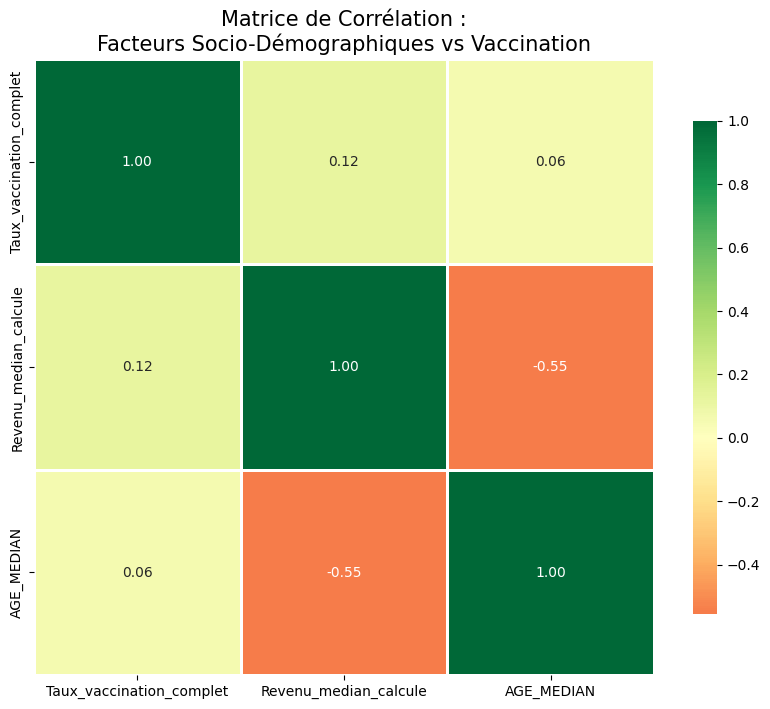

In [ ]:

colonnes_cles = [
    'Taux_vaccination_complet',
    'Revenu_median_calcule',
    'AGE_MEDIAN',
    'Score_Education_Moyen',
]


df_heatmap = df_total[[c for c in colonnes_cles if c in df_total.columns]].copy()

# Calcul des corrélations
correlations = df_heatmap.corr()


plt.figure(figsize=(10, 8))

sns.heatmap(
    correlations,
    annot=True,
    cmap='RdYlGn', # Vert = positif, Rouge = négatif
    center=0,
    fmt=".2f",
    linewidths=1,
    cbar_kws={"shrink": .8}
)

plt.title("Matrice de Corrélation :\nFacteurs Socio-Démographiques vs Vaccination", fontsize=15)
plt.show()

**Taux de vaccination**

Coefficient proche de 0 ( 0.06 avec l'Âge ou 0.12 avec le Revenu)

On observe une corrélation quasi-nulle entre les facteurs socio-économiques et le taux de vaccination final. Cela indique que la couverture vaccinale n'a pas été impactée par la richesse ou l'âge moyen des départements.

La politique du "Pass Sanitaire" et la gratuité totale ont lissé les différences de plus, on observe les données en fin de campagne de vaccination.


**Revenu et Éducation**

La matrice révèle une corrélation forte et positive entre le Revenu Médian et le Score d'Éducation.
Les départements avec les plus hauts niveaux de diplômes sont aussi ceux où la valeur ajoutée économique et les salaires sont les plus élevés.


**Âge et Revenu**

Il existe une corrélation négative entre l'Âge Médian et le Revenu Médian.
Les départements les plus "jeunes" (souvent les métropoles comme Paris ou Lyon) concentrent les revenus les plus hauts, tandis que les départements plus âgés (zones rurales) ont des revenus médians plus modestes.

#**Scatterplot : Revenu 💶 vs Vaccination 💉**


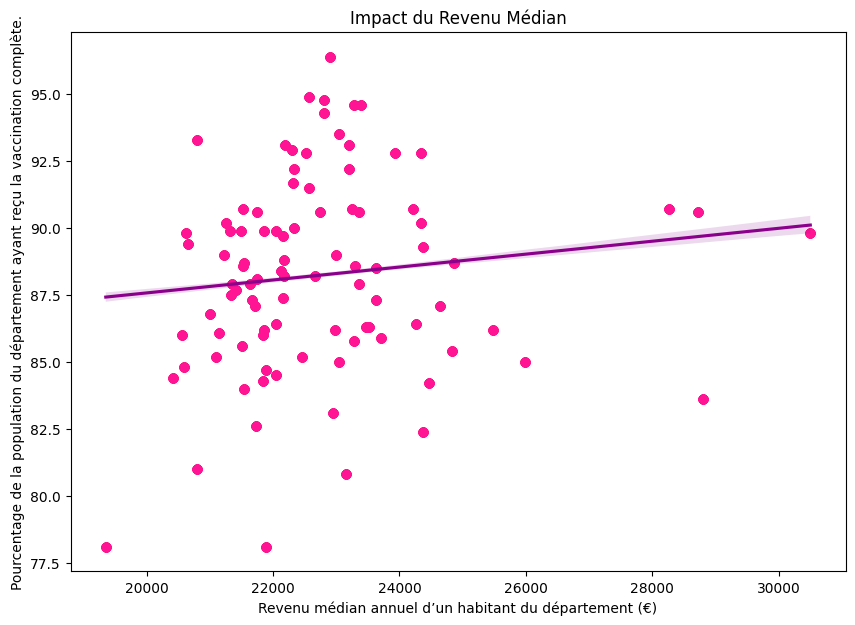

In [ ]:
plt.figure(figsize=(10,7))
sns.regplot(data=df_total, x='Revenu_median_calcule', y='Taux_vaccination_complet',
            scatter_kws={'alpha':0.5, 'color':'deeppink'}, line_kws={'color':'darkmagenta'})
plt.title('Impact du Revenu Médian')
plt.xlabel('Revenu médian annuel d’un habitant du département (€)')
plt.ylabel('Pourcentage de la population du département ayant reçu la vaccination complète.')
plt.show()


La droite de régression : La ligne violette montre une tendance positive, ce qui suggère que plus le revenu médian d'un département est élevé, plus le taux de vaccination a tendance à être élevé.


Bien qu'il y ait une corrélation positive, elle semble faible. Le revenu n'est clairement pas le seul facteur expliquant le taux de vaccination.


Valeurs extrêmes :

À gauche, un département pauvre (env. 19 500 €) a un taux très bas (sous les 78 %).

À droite, quelques départements sont beaucoup plus riches (plus de 28 000 €), comme Paris ou les Hauts-de-Seine, et affichent des taux de vaccination solides (autour de 90 %), confirmant la tendance de la droite.


#**Scatterplot : Éducation 📚 vs Vaccination 💉**

In [ ]:
#on remplace les noms des diplomes par des valeurs numerique pour le scatterplot
education_scatterplot = {
    'Aucun diplôme / CEP': 0,
    'BEPC / DNB': 1,
    'CAP / BEP': 2,
    'Bac / Brevet pro': 3,
    'BTS / DUT / Bac+2': 4,
    'Licence / Bac+3-4': 5,
    'Master / Bac+5+': 6
}

# Création d'une nouvelle colonne numérique
df_total['NIVEAU_EDUCATION'] = df_total['EDUC'].map(education_scatterplot)

df_total.head()

,DEP,Masse_Revenu,Nombre_habitants,Revenu_median_calcule,Nb_vaccines_complet,Nb_vaccines_rappel,Taux_vaccination_complet,Taux_vaccination_rappel,EDUC,NB_PERSONNES_x,AGE,NB_PERSONNES_y,POP_TOT,POURCENTAGE,AGE_MEDIAN,NIVEAU_EDUCATION
0,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,15-24,114431.132239,2.109716e+06,5.424006,41.255572,1.0
1,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,20-64,587293.854589,2.109716e+06,27.837579,41.255572,1.0
2,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,25-39,177961.951238,2.109716e+06,8.435351,41.255572,1.0
3,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,40-54,216652.117650,2.109716e+06,10.269255,41.255572,1.0
4,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,55-64,144304.296828,2.109716e+06,6.839987,41.255572,1.0


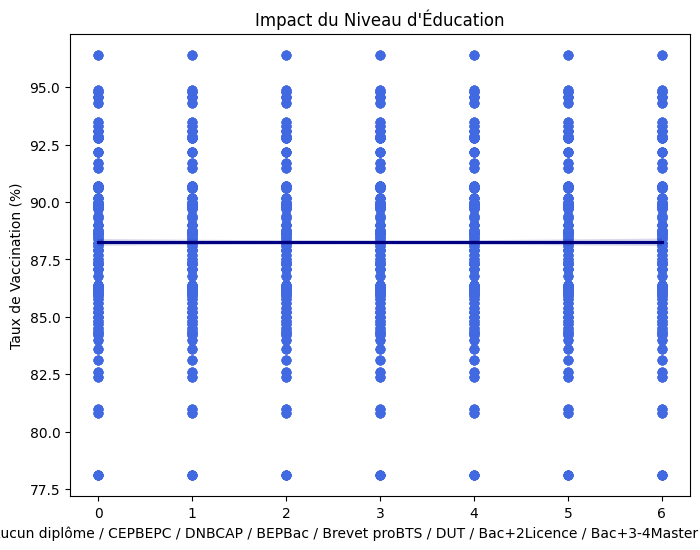

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_total, x='NIVEAU_EDUCATION', y='Taux_vaccination_complet',
            scatter_kws={'alpha':0.5, 'color':'royalblue'}, line_kws={'color':'navy'})
plt.title("Impact du Niveau d'Éducation")
plt.xlabel('Aucun diplôme / CEP' 'BEPC / DNB''CAP / BEP''Bac / Brevet pro''BTS / DUT / Bac+2''Licence / Bac+3-4''Master / Bac+5+' )
plt.ylabel('Taux de Vaccination (%)')
plt.show()


Ici, il y a un problème on observe que les points s'empilent verticalement, le scatterplot n'est pas interprétable.
Le taux de vaccination pour un département est unique et ne dépend pas du niveau d'études, on n'a pas de jeux de données liants directement le taux de vaccination à l'éducation. Ainsi on ne peut pas les comparer 'brutalement'.

**💡Nouvelle idée : donner à chaque niveau d'éducation un poids puis calculer la moyenne pondérée pour chaque département.**

/tmp/ipython-input-1710395687.py:26: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



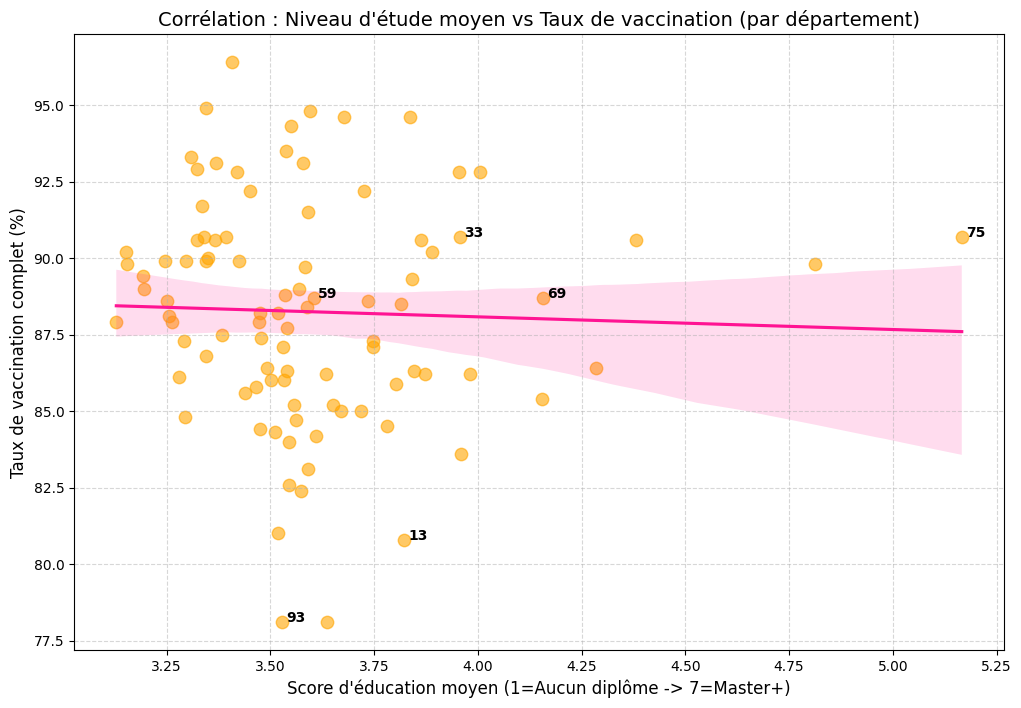

In [ ]:
# Attribution du poids pour les différents niveaux d'éducation

# Dictionnaire des poids
poids_diplomes = {
    'Aucun diplôme / CEP': 1,
    'BEPC / DNB': 2,
    'CAP / BEP': 3,
    'Bac / Brevet pro': 4,
    'BTS / DUT / Bac+2': 5,
    'Licence / Bac+3-4': 6,
    'Master / Bac+5+': 7
}

# On exclut la ligne "Total" pour ne pas fausser la moyenne
df_edu_details = education[education['EDUC'] != 'Total'].copy()

# On applique le poids à chaque ligne
df_edu_details['poids'] = df_edu_details['EDUC'].map(poids_diplomes)

# Calcul du score pondéré par département : Somme(nb_personnes * poids) / Somme(nb_personnes)
def score_pondere(group):
    total_hab = group['NB_PERSONNES'].sum()
    if total_hab == 0: return 0
    return (group['NB_PERSONNES'] * group['poids']).sum() / total_hab

df_score_final = df_edu_details.groupby('DEP').apply(score_pondere).reset_index()
df_score_final.columns = ['DEP', 'Score_Education_Moyen']

# Fusion sur le code département (DEP)
df_analyse = pd.merge(df_score_final, covid, on='DEP')

plt.figure(figsize=(12, 8))
sns.regplot(data=df_analyse, x='Score_Education_Moyen', y='Taux_vaccination_complet',
            scatter_kws={'alpha':0.6, 's':80,'color': 'orange'}, line_kws={'color':'deeppink'})

# Ajout de quelques labels pour les départements particuliers
deps_to_label = ['75', '69', '13', '93', '33', '59']
for i in range(df_analyse.shape[0]):
    row = df_analyse.iloc[i]
    if row['DEP'] in deps_to_label:
        plt.text(row['Score_Education_Moyen']+0.01, row['Taux_vaccination_complet'], row['DEP'], fontsize=10, weight='bold')

plt.title("Corrélation : Niveau d'étude moyen vs Taux de vaccination (par département)", fontsize=14)
plt.xlabel("Score d'éducation moyen (1=Aucun diplôme -> 7=Master+)", fontsize=12)
plt.ylabel("Taux de vaccination complet (%)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)


**Absence de corrélation linéaire forte**
La ligne de régression rose est quasiment horizontale (très légèrement descendante). Cela indique que, globalement, le niveau d'éducation moyen d'un département n'est pas un prédicteur fiable de son taux de vaccination.

L'intervalle de confiance (la zone rose) s'élargit énormément vers la droite, ce qui montre que pour les hauts niveaux de diplôme, les comportements varient énormément.

**Une grande disparité pour des niveaux d'études similaires**
On observe une forte concentration de points entre les scores 3.25 et 3.75 (ce qui correspond globalement à une moyenne entre le CAP et le Bac).

Pour un même score d'éducation (environ 3.5), on trouve des départements avec près de 95% de vaccination et d'autres à moins de 80% (comme le 93).

Cela prouve que d'autres facteurs (socio-économiques, accès aux soins, densité urbaine, structure par âge) jouent un rôle bien plus déterminant que le diplôme seul.

**Analyse des cas particuliers**

* Paris (75) : Possède le score d'éducation le plus élevé de France (plus de 5) avec un taux de vaccination élevé (environ 91%), mais il n'est pas le "champion" de la vaccination malgré son niveau d'études.

* Seine-Saint-Denis (93) : Présente l'un des taux de vaccination les plus bas (environ 78%) pour un niveau d'étude pourtant proche de la moyenne nationale. Cela suggère des barrières d'accès ou des facteurs sociaux spécifiques.

* Bouches-du-Rhône (13) : Se situe également assez bas par rapport à la tendance générale, malgré un niveau d'études supérieur à la moyenne.

* Rhône (69) et Gironde (33) : Ces départements urbains ont des scores d'éducation élevés et des taux de vaccination plutôt stables autour de 88-90%.

#**Scatterplot : Âge 📆 vs Vaccination 💉**

In [ ]:
df_total.head(50)

,DEP,Masse_Revenu,Nombre_habitants,Revenu_median_calcule,Nb_vaccines_complet,Nb_vaccines_rappel,Taux_vaccination_complet,Taux_vaccination_rappel,EDUC,NB_PERSONNES_x,AGE,NB_PERSONNES_y,POP_TOT,POURCENTAGE,AGE_MEDIAN,NIVEAU_EDUCATION
0,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,15-24,114431.132239,2.109716e+06,5.424006,41.255572,1.0
1,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,20-64,587293.854589,2.109716e+06,27.837579,41.255572,1.0
2,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,25-39,177961.951238,2.109716e+06,8.435351,41.255572,1.0
3,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,40-54,216652.117650,2.109716e+06,10.269255,41.255572,1.0
4,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,55-64,144304.296828,2.109716e+06,6.839987,41.255572,1.0
5,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,65+,206913.170988,2.109716e+06,9.807632,41.255572,1.0
6,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,65-79,150902.159827,2.109716e+06,7.152724,41.255572,1.0
7,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,80+,56011.011162,2.109716e+06,2.654908,41.255572,1.0
8,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,<15,194595.331057,2.109716e+06,9.223769,41.255572,1.0
9,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,<20,260650.974423,2.109716e+06,12.354790,41.255572,1.0


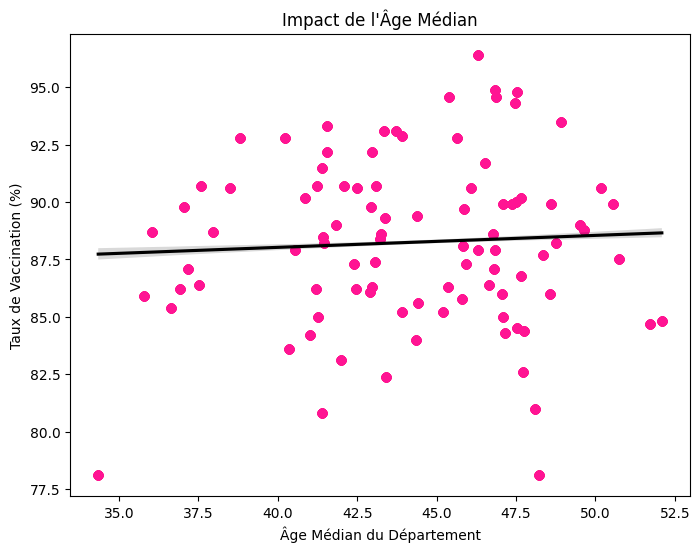

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data=df_total, x='AGE_MEDIAN', y='Taux_vaccination_complet',
            scatter_kws={'alpha':0.5, 'color':'deeppink'}, line_kws={'color':'black'})
plt.title("Impact de l'Âge Médian")
plt.xlabel('Âge Médian du Département')
plt.ylabel('Taux de Vaccination (%)')
plt.show()


In [ ]:
df_total.head(50)

,DEP,Masse_Revenu,Nombre_habitants,Revenu_median_calcule,Nb_vaccines_complet,Nb_vaccines_rappel,Taux_vaccination_complet,Taux_vaccination_rappel,EDUC,NB_PERSONNES_x,AGE,NB_PERSONNES_y,POP_TOT,POURCENTAGE,AGE_MEDIAN,NIVEAU_EDUCATION
0,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,15-24,114431.132239,2.109716e+06,5.424006,41.255572,1.0
1,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,20-64,587293.854589,2.109716e+06,27.837579,41.255572,1.0
2,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,25-39,177961.951238,2.109716e+06,8.435351,41.255572,1.0
3,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,40-54,216652.117650,2.109716e+06,10.269255,41.255572,1.0
4,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,55-64,144304.296828,2.109716e+06,6.839987,41.255572,1.0
5,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,65+,206913.170988,2.109716e+06,9.807632,41.255572,1.0
6,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,65-79,150902.159827,2.109716e+06,7.152724,41.255572,1.0
7,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,80+,56011.011162,2.109716e+06,2.654908,41.255572,1.0
8,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,<15,194595.331057,2.109716e+06,9.223769,41.255572,1.0
9,01,2.489976e+10,957937.833333,25993.080953,472217,218774,85.0,39.4,BEPC / DNB,23505.38675,<20,260650.974423,2.109716e+06,12.354790,41.255572,1.0


**Observations:**

La droite de régression est légèrement ascendante. Cela suggère que les départements plus âgés ont tendance à être davantage vaccinés.

Cependant, la pente faible indique que l'âge seul n'explique qu'une partie limitée des différences de taux de vaccination observées entre les départements.

Cela parait logique car les personnes âgées:
- ont été prioritaires dans les campagnes de vaccination
- sont plus vulnérables
- ont souvent un meilleur suivi médical

# **Étape 3 : Clustering 🎀**

In [ ]:
# On s'assure que DEP est au même format partout (en texte/str)
df_total['DEP'] = df_total['DEP'].astype(str)
df_score_final['DEP'] = df_score_final['DEP'].astype(str)

# Fusion : on ajoute le score education ponédéré à df_total
df_total = df_total.merge(df_score_final, on='DEP', how='left')

# affiche les colonnes pour être sûr
print("Colonnes dans df_total :", df_total.columns.tolist())

Colonnes dans df_total : ['DEP', 'Masse_Revenu', 'Nombre_habitants', 'Revenu_median_calcule', 'Nb_vaccines_complet', 'Nb_vaccines_rappel', 'Taux_vaccination_complet', 'Taux_vaccination_rappel', 'EDUC', 'NB_PERSONNES_x', 'AGE', 'NB_PERSONNES_y', 'POP_TOT', 'POURCENTAGE', 'AGE_MEDIAN', 'NIVEAU_EDUCATION', 'Score_Education_Moyen']


         AGE_MEDIAN  Revenu_median_calcule  Score_Education_Moyen  \
Cluster                                                             
0         40.909746           24032.667447               3.867002   
1         38.363590           29072.029873               4.579948   
2         47.731806           21873.185468               3.436508   
3         42.183335           22097.948863               3.460220   

         Taux_vaccination_complet  
Cluster                            
0                       87.921739  
1                       88.675000  
2                       88.257143  
3                       88.460000  


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



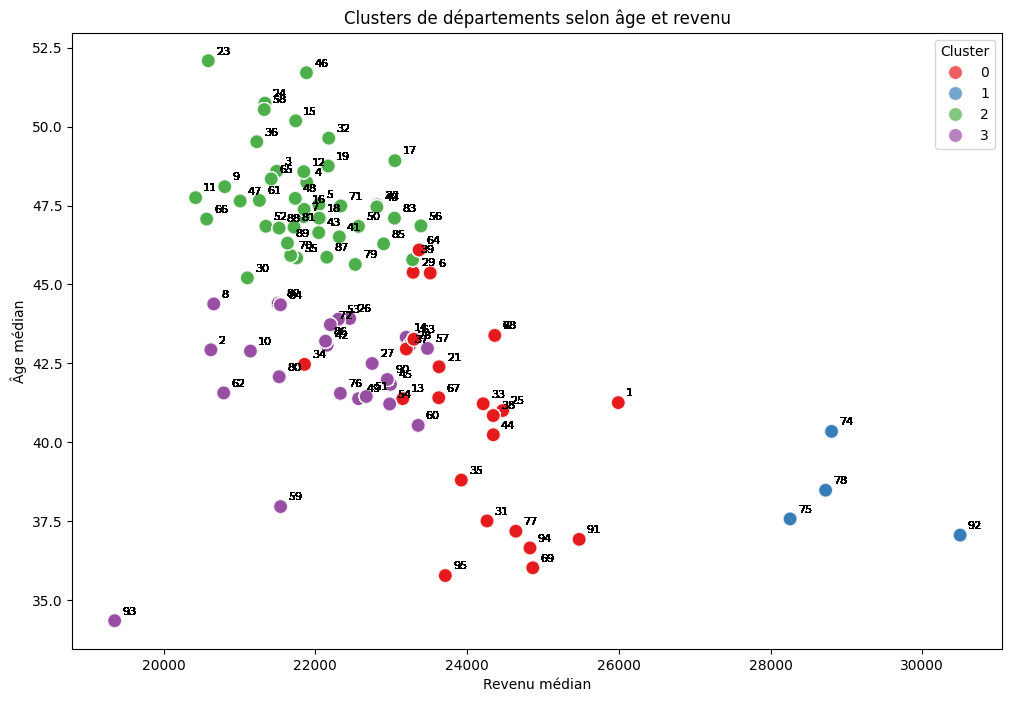

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# On prend les colonnes utiles : Age médian, Revenu médian, Score d'éducation
df_clusters = df_total[['AGE_MEDIAN', 'Revenu_median_calcule', 'Score_Education_Moyen']].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clusters)

#On applique Kmeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_total['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = df_total.groupby('Cluster')[['AGE_MEDIAN', 'Revenu_median_calcule', 'Score_Education_Moyen', 'Taux_vaccination_complet']].mean()
print(cluster_summary)
#on visualise les clusters
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Revenu_median_calcule',
    y='AGE_MEDIAN',
    hue='Cluster',
    palette='Set1',
    data=df_total,
    s=100,
    alpha=0.7
)

#on ajoute le numéro de chaque département à coté du point correspondant
for i, row in df_total.iterrows():
    plt.text(
        row['Revenu_median_calcule'] + 100,
        row['AGE_MEDIAN'] + 0.2,
        str(int(row['DEP'])),
        fontsize=8
    )

plt.title("Clusters de départements selon âge et revenu")
plt.xlabel("Revenu médian")
plt.ylabel("Âge médian")
plt.legend(title='Cluster')
plt.show()


# **Clusters :**

**Cluster 0 :** Adultes d’âge moyen avec un revenu moyen et un niveau d’éducation moyen

**Cluster 1 :** Jeunes avec un revenu élevé et un niveau d’éducation élevé

**Cluster 2 :** Adultes âgés avec un revenu faible et un niveau d’éducation faible

**Cluster 3 :** Adultes d’âge moyen avec un revenu faible et un niveau d’éducation moyen

# **Observations 👆🏼:**
Pour le Cluster 2 (profil socio-économiquement défavorisé), on constate que le taux de vaccination est relativement élevé, suggérant que ces profils se vaccinent davantage.

Pour le Cluster 0 (profil intermédiaire), les comportements de vaccination sont très hétérogènes, ce qui empêche de tirer une conclusion nette.
Dans l’analyse des clusters, l’âge apparaît comme un facteur plus influent sur la vaccination que le revenu ou le niveau d’éducation.

Cependant, lorsque l’on examine l’âge seul dans le scatterplot, son effet sur la vaccination est relativement faible. Le clustering permet donc de mettre en évidence des nuances que l’on ne perçoit pas en regardant chaque variable isolément.

# **Étape 4 : Modélisation** 🎀


# **REGRESSSION LINÉAIRE**

Étapes :

* réparation et Split (Entraînement vs Test)
On ne teste jamais un modèle sur les mêmes données que celles servant à l'entraîner. On garde une partie des départements "cachés" pour simuler des conditions réelles.

* Évaluation des performances
Maintenant, on demande au modèle de prédire le taux de vaccination des départements qu'il n'a jamais vus (X_test) et on compare avec la réalité (y_test).

* "Prédiction vs Réalité"



Score R² (Précision) : 0.08
Erreur moyenne (MAE) : 2.82 %
                       Coefficient
AGE_MEDIAN                0.080920
Revenu_median_calcule     0.000929
Score_Education_Moyen    -3.984116


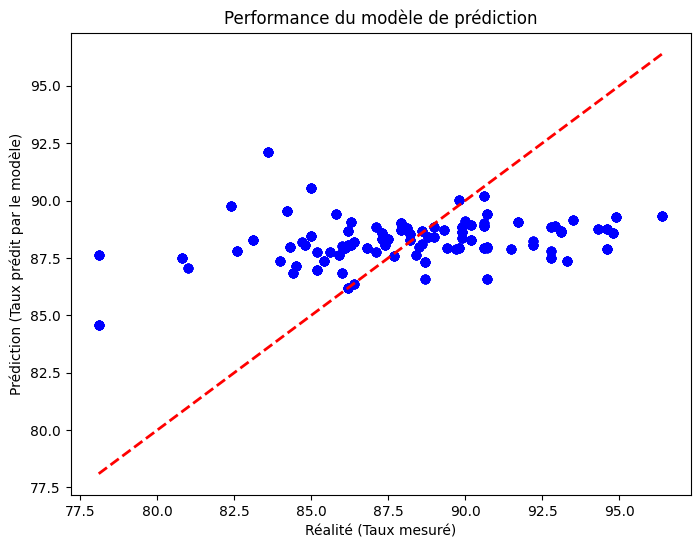

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

df_graph = df_total[colonnes_cles].dropna()

# 1. On définit X (nos facteurs) et y (notre cible)
X = df_graph[['Revenu_median_calcule', 'AGE_MEDIAN', 'Score_Education_Moyen']]
y = df_graph['Taux_vaccination_complet']

# 2. Split : 80% pour apprendre, 20% pour tester
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Scores
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Score R² (Précision) : {r2:.2f}")
print(f"Erreur moyenne (MAE) : {mae:.2f} %")

#analyse des poids pas fou peut etre elenver et garder que le graphe (+parlant)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Réalité (Taux mesuré)')
plt.ylabel('Prédiction (Taux prédit par le modèle)')
plt.title('Performance du modèle de prédiction')
plt.show()

Les points bleus ne suivent pas du tout la ligne rouge pointillée. Le modèle a tendance à "écraser" ses prédictions autour de 88% sans réussir à capter les départements qui vaccinent très peu (77%) ou très fort (95%).

Modélisation non adaptée.

# **RANDOM FOREST**

--- Comparaison des modèles ---
R² Régression Linéaire : 0.079
R² Random Forest      : 1.000
Erreur Moyenne RF     : 0.00 %


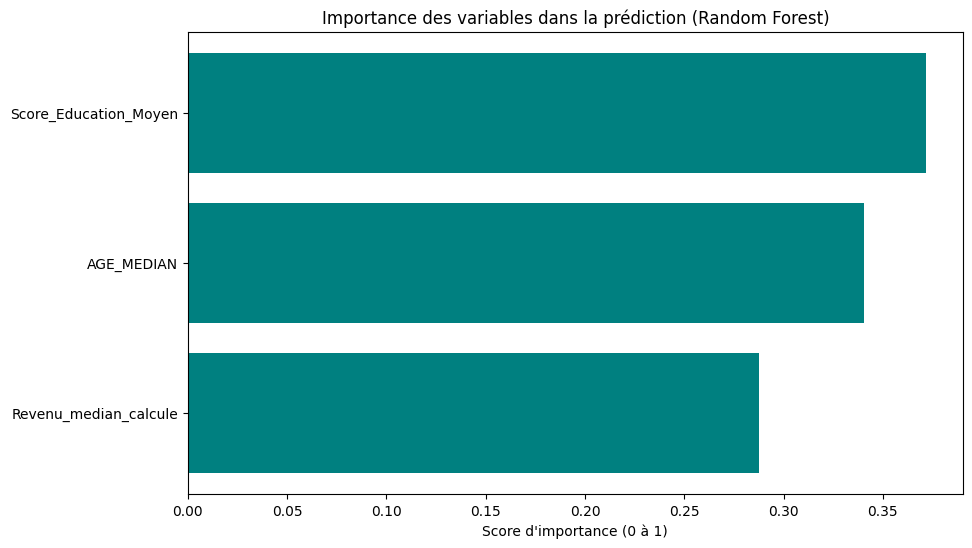

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Création du modèle (on fixe random_state pour avoir toujours le même résultat)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Entraînement
rf_model.fit(X_train, y_train)

# 3. Prédictions
y_pred_rf = rf_model.predict(X_test)

# 4. Évaluation
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"--- Comparaison des modèles ---")
print(f"R² Régression Linéaire : {r2:.3f}") # On reprend le r2 précédent
print(f"R² Random Forest      : {r2_rf:.3f}")
print(f"Erreur Moyenne RF     : {mae_rf:.2f} %")

# Extraction de l'importance
importances = rf_model.feature_importances_
features = X.columns
df_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=True)

# Graphique
plt.figure(figsize=(10, 6))
plt.barh(df_importance['Feature'], df_importance['Importance'], color='teal')
plt.title('Importance des variables dans la prédiction (Random Forest)')
plt.xlabel('Score d\'importance (0 à 1)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. On sépare les données (X = facteurs, y = cible)
X = df_total[['AGE_MEDIAN', 'Revenu_median_calcule', 'Score_Education_Moyen']]
y = df_total['Taux_vaccination_complet']

# 2. IMPORTANT : On divise en deux groupes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. On entraîne le modèle UNIQUEMENT sur le groupe "Train"
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. On prédit sur le groupe "Test" (celui qu'il ne connaît pas)
y_pred_rf = rf_model.predict(X_test)

# 5. On calcule le VRAI score
r2_reel = r2_score(y_test, y_pred_rf)
mae_reel = mean_absolute_error(y_test, y_pred_rf)

print(f"VRAI R² Random Forest : {r2_reel:.3f}")
print(f"VRAIE Erreur Moyenne : {mae_reel:.2f} %")

VRAI R² Random Forest : 1.000
VRAIE Erreur Moyenne : 0.00 %


On a uniquement 94 départements, il finit par l'apprendre par coeur. (Overfitting). Même en essayant sur 80% cela ne change rien.